In [37]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')
%matplotlib inline 

In [38]:
confirmed_cases = pd.read_csv('D:/Workspace/dataset/Coronavirus_prediction_analysis/time_series_covid-19_confirmed.csv')
recovered_cases = pd.read_csv('D:/Workspace/dataset/Coronavirus_prediction_analysis/time_series_covid-19_recovered.csv')
deaths_reported = pd.read_csv('D:/Workspace/dataset/Coronavirus_prediction_analysis/time_series_covid-19_deaths.csv')

In [39]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,48,50,50,50,53,59,70,75,82,114
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,420,461,502,511,581,639,639,701,773,839
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,130,138,150,150,160,178,178,200,212,226
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,83,93,99,117,129,149,149,197,238,428


In [40]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,31,31,31,31,33,34,34,35,35,35
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,46,76,76,76,101,118,118,118,118,118
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,78,78,78,78,78,96,96,97,105,105
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,22,23,24,24,24,26,26,26,35,42


In [41]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,6,6,6,10,10,15,16,19,22,22
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
confirmed_col = confirmed_cases.keys()
confirmed_col

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20'],
      dtype='object')

In [43]:
confirmed = confirmed_cases.loc[:, confirmed_col[4]:confirmed_col[-1]]
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,2,3,5,7,8,8,14,14,14,19,...,48,50,50,50,53,59,70,75,82,114
1,2,1,2,2,4,4,7,7,11,15,...,420,461,502,511,581,639,639,701,773,839
2,0,1,3,3,4,5,7,7,10,13,...,130,138,150,150,160,178,178,200,212,226
3,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,3,4,4,4,7,8,8,...,83,93,99,117,129,149,149,197,238,428


In [44]:
deaths  = deaths_reported.loc[:, confirmed_col[4]:confirmed_col[-1]]
deaths.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,6,6,6,10,10,15,16,19,22,22
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
recoveries = recovered_cases.loc[:, confirmed_col[4]:confirmed_col[-1]]
recoveries.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,0,0,0,0,2,2,5,5,5,5,...,31,31,31,31,33,34,34,35,35,35
1,0,0,0,0,1,1,1,1,1,1,...,46,76,76,76,101,118,118,118,118,118
2,0,0,0,0,0,0,0,0,0,0,...,78,78,78,78,78,96,96,97,105,105
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,22,23,24,24,24,26,26,26,35,42


In [46]:
#data wise confirmed, death and recovery cases and mortality rate which is the death_sum/confirmed cases.
dates = confirmed.keys()
total_confirmed_world_cases = []
total_deaths = []
total_recovered = []
mortality_rate = []
for date in dates:
    confirmed_sum = confirmed[date].sum()
    death_sum = deaths[date].sum()
    recovered_sum = recoveries[date].sum()
    mortality = death_sum/confirmed_sum
    total_confirmed_world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    mortality_rate.append(mortality)


In [47]:
confirmed_sum

167449

In [48]:
death_sum

6440

In [49]:
recovered_sum

76034

In [50]:
total_confirmed_world_cases

[555,
 653,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30817,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76823,
 78579,
 78965,
 79568,
 80413,
 81395,
 82754,
 84120,
 86011,
 88369,
 90306,
 92840,
 95120,
 97882,
 101784,
 105821,
 109795,
 113561,
 118592,
 125865,
 128343,
 145193,
 156097,
 167449]

In [51]:
#to numpy array
total_confirmed_world_cases = np.array(total_confirmed_world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)
total_dates =  np.array([i for i in range(len(dates))]).reshape(-1, 1)

In [52]:
total_dates

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53]])

In [53]:
# Future forecasting for the next 10 days
days_in_future = 10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)

In [54]:
#convert dates in %m/%d/%Y' formate
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forecast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [55]:
future_forcast_dates

['01/22/2020',
 '01/23/2020',
 '01/24/2020',
 '01/25/2020',
 '01/26/2020',
 '01/27/2020',
 '01/28/2020',
 '01/29/2020',
 '01/30/2020',
 '01/31/2020',
 '02/01/2020',
 '02/02/2020',
 '02/03/2020',
 '02/04/2020',
 '02/05/2020',
 '02/06/2020',
 '02/07/2020',
 '02/08/2020',
 '02/09/2020',
 '02/10/2020',
 '02/11/2020',
 '02/12/2020',
 '02/13/2020',
 '02/14/2020',
 '02/15/2020',
 '02/16/2020',
 '02/17/2020',
 '02/18/2020',
 '02/19/2020',
 '02/20/2020',
 '02/21/2020',
 '02/22/2020',
 '02/23/2020',
 '02/24/2020',
 '02/25/2020',
 '02/26/2020',
 '02/27/2020',
 '02/28/2020',
 '02/29/2020',
 '03/01/2020',
 '03/02/2020',
 '03/03/2020',
 '03/04/2020',
 '03/05/2020',
 '03/06/2020',
 '03/07/2020',
 '03/08/2020',
 '03/09/2020',
 '03/10/2020',
 '03/11/2020',
 '03/12/2020',
 '03/13/2020',
 '03/14/2020',
 '03/15/2020',
 '03/16/2020',
 '03/17/2020',
 '03/18/2020',
 '03/19/2020',
 '03/20/2020',
 '03/21/2020',
 '03/22/2020',
 '03/23/2020',
 '03/24/2020',
 '03/25/2020']

In [56]:
latest_confirmed = confirmed_cases[dates[-1]]
latest_deaths = deaths_reported[dates[-1]]
latest_recoveries = recovered_cases[dates[-1]]

In [57]:
latest_confirmed

0      114
1      839
2      226
3        1
4      428
      ... 
445      1
446      1
447      1
448      1
449      1
Name: 3/15/20, Length: 450, dtype: int64

In [58]:
latest_deaths

0       1
1      22
2       0
3       0
4       0
       ..
445     0
446     0
447     0
448     0
449     0
Name: 3/15/20, Length: 450, dtype: int64

In [59]:
latest_recoveries

0       35
1      118
2      105
3        1
4       42
      ... 
445      0
446      0
447      0
448      0
449      0
Name: 3/15/20, Length: 450, dtype: int64

In [60]:
unique_countries  = list(confirmed_cases['Country/Region'].unique())
country_confirmed_cases = []
no_cases = []
for i in unique_countries :
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries .remove(i)

#sort 
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]

for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

In [61]:
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')    

China: 81003 cases
Italy: 24747 cases
Iran: 13938 cases
Korea, South: 8162 cases
Spain: 7798 cases
Germany: 5795 cases
France: 4513 cases
US: 3499 cases
Switzerland: 2200 cases
Norway: 1221 cases
United Kingdom: 1144 cases
Netherlands: 1135 cases
Sweden: 1022 cases
Belgium: 886 cases
Denmark: 875 cases
Austria: 860 cases
Japan: 839 cases
Cruise Ship: 696 cases
Malaysia: 428 cases
Qatar: 401 cases
Greece: 331 cases
Australia: 297 cases
Czechia: 253 cases
Canada: 252 cases
Israel: 251 cases
Portugal: 245 cases
Finland: 244 cases
Singapore: 226 cases
Slovenia: 219 cases
Bahrain: 214 cases
Estonia: 171 cases
Iceland: 171 cases
Brazil: 162 cases
Philippines: 140 cases
Romania: 131 cases
Ireland: 129 cases
Poland: 119 cases
Indonesia: 117 cases
Iraq: 116 cases
Thailand: 114 cases
India: 113 cases
Kuwait: 112 cases
Egypt: 110 cases
Lebanon: 110 cases
Saudi Arabia: 103 cases
San Marino: 101 cases
United Arab Emirates: 98 cases
Chile: 74 cases
Russia: 63 cases
Luxembourg: 59 cases
Taiwan*: 59 c

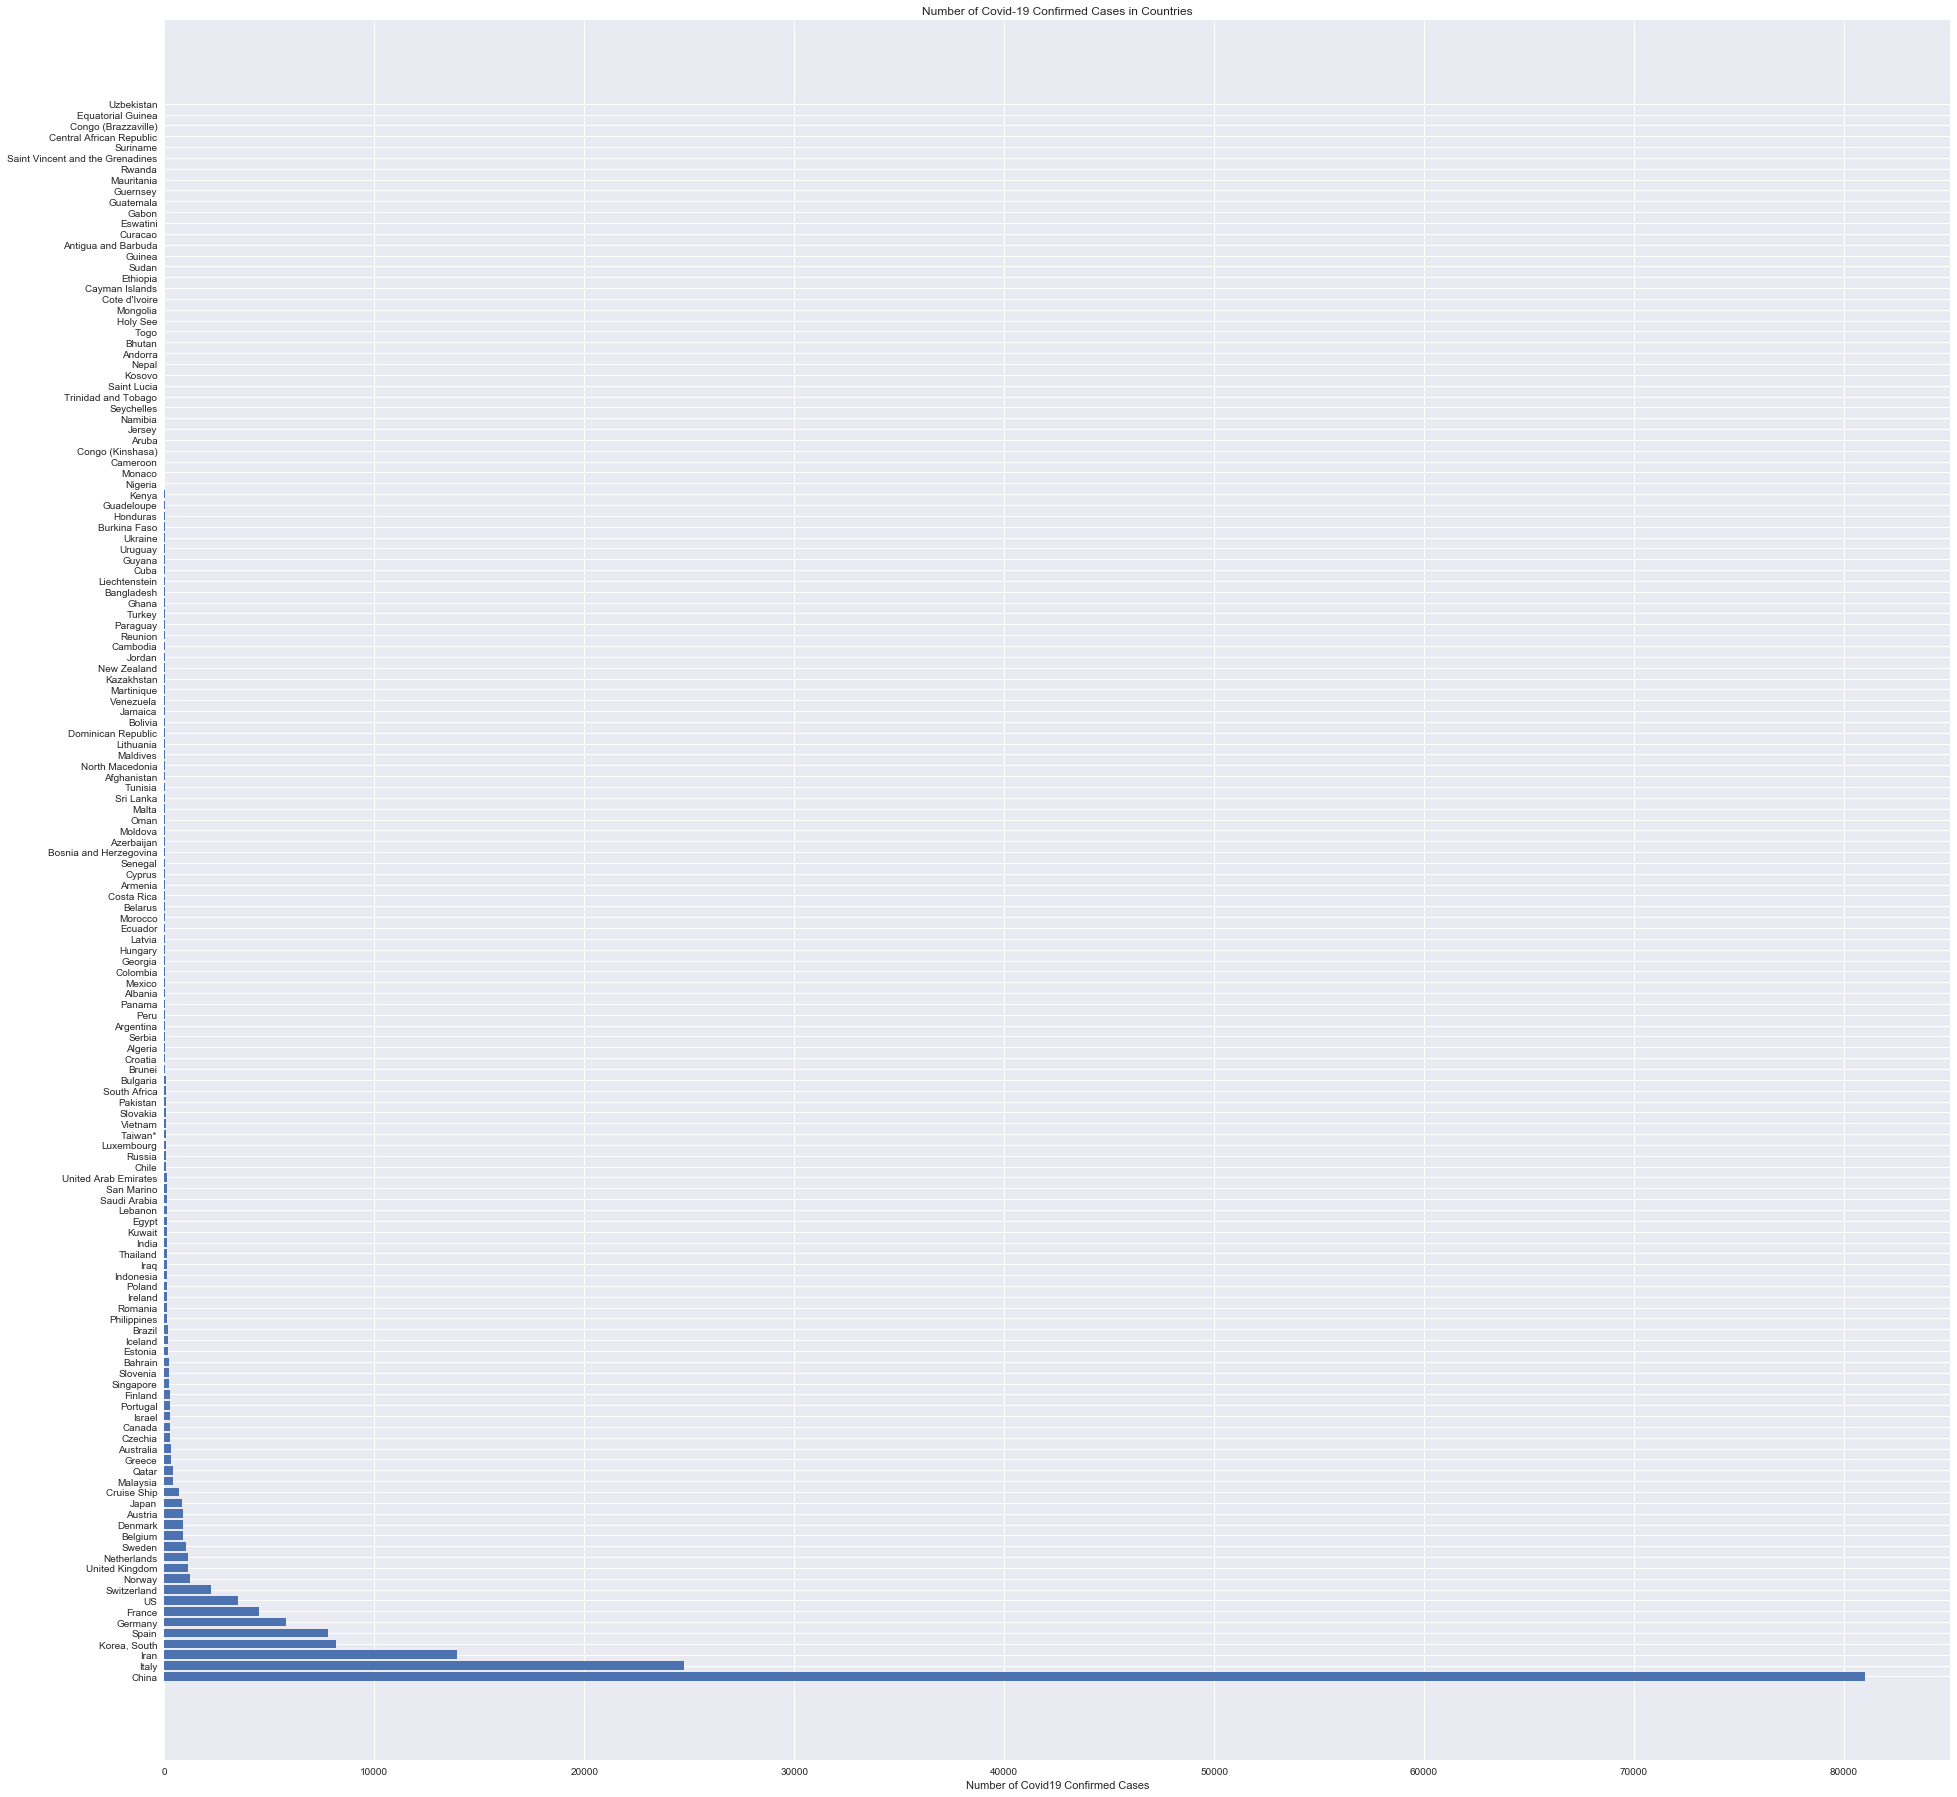

In [62]:
# Plot a bar graph to see the total confirmed cases across different countries
plt.figure(figsize=(32, 32))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries')
plt.xlabel('Number of Covid19 Confirmed Cases')
plt.show()

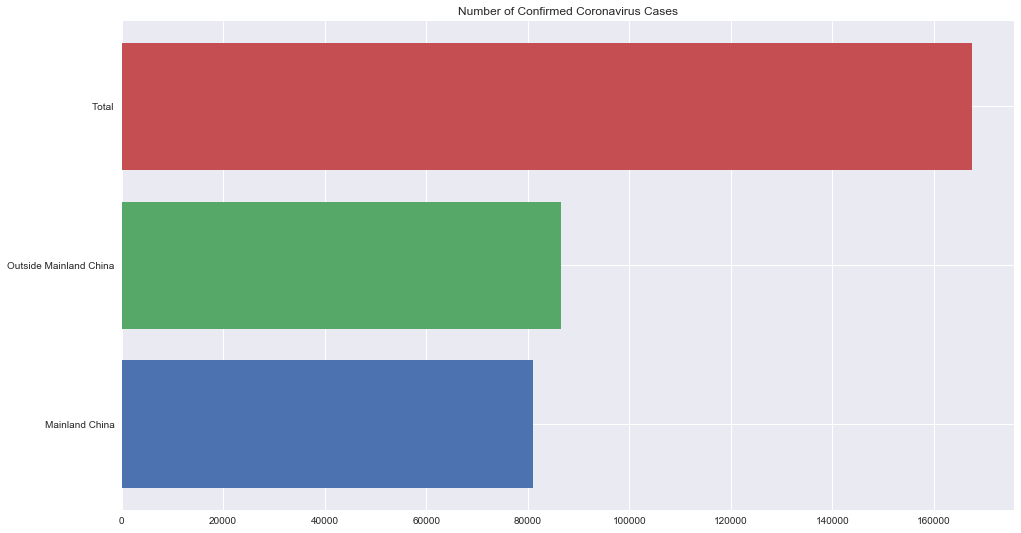

Outside Mainland China 86446 cases:
Mainland China: 81003 cases
Total: 167449 cases


In [63]:
# Plot a bar graph to see the total confirmed cases between mainland china and outside mainland china 
china_confirmed = latest_confirmed[confirmed_cases['Country/Region']=='China'].sum()
outside_mainland_china_confirmed = np.sum(country_confirmed_cases) - china_confirmed
plt.figure(figsize=(16, 9))
plt.barh('Mainland China', china_confirmed)
plt.barh('Outside Mainland China', outside_mainland_china_confirmed)
plt.title('Number of Confirmed Coronavirus Cases')
plt.barh('Total', latest_confirmed.sum())
plt.show()

print('Outside Mainland China {} cases:'.format(outside_mainland_china_confirmed))
print('Mainland China: {} cases'.format(china_confirmed))
print('Total: {} cases'.format(latest_confirmed.sum()))


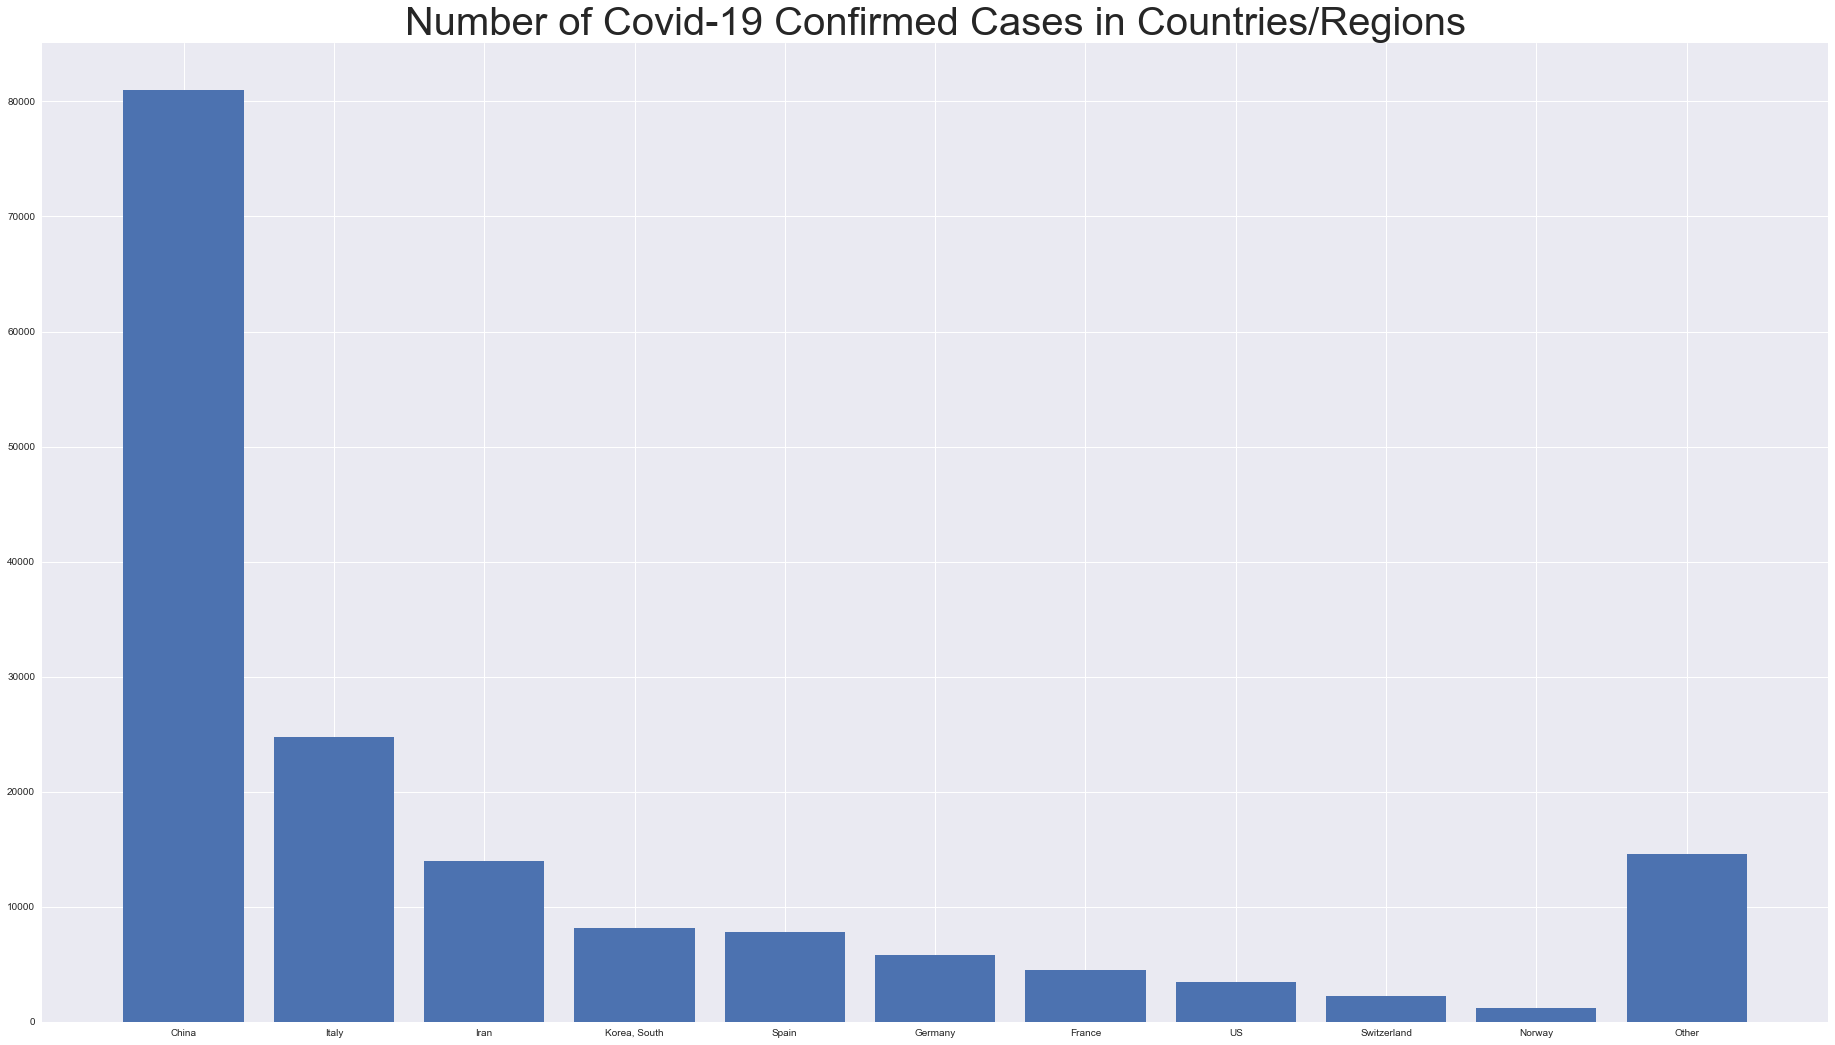

In [64]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the category named others
ConfirmedCases_10 = country_confirmed_cases[:10]
UniqueCountries_10 = unique_countries[:10]
others = np.sum(country_confirmed_cases[10:-1])
ConfirmedCases_10.append(others)
UniqueCountries_10.append('Other')

plt.figure(figsize=(32,18))
plt.bar(UniqueCountries_10,ConfirmedCases_10)
plt.title('Number of Covid-19 Confirmed Cases in Countries/Regions', size=40)
plt.show()


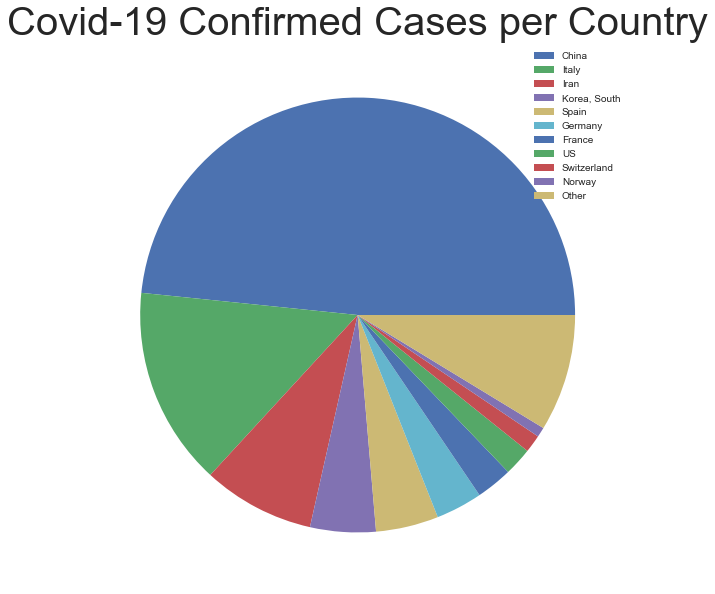

In [65]:
# Create a pie chart to see the total confirmed cases in 10 different countries

plt.figure(figsize=(10,10))
plt.title('Covid-19 Confirmed Cases per Country', size=40)
plt.pie(ConfirmedCases_10)
plt.legend(UniqueCountries_10, loc='best')
plt.show()

In [66]:
# Building the SVM model
kernel = ['poly', 'sigmoid', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

svm = SVR()

In [67]:
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(total_dates, total_confirmed_world_cases, test_size=0.15, shuffle=False)
svm_search.fit(X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    3.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   14.1s finished
d:\program files\microsoft visual studio\shared\python37_64\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid='warn', n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [68]:
svm_search.best_params_

{'shrinking': True, 'kernel': 'poly', 'gamma': 0.01, 'epsilon': 0.1, 'C': 10}

In [69]:
svm_search.best_estimator_

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [92]:
svm_pred = svm_search.predict(future_forecast)
svm_pred

array([ 30387.44430898,  30388.42176407,  30395.26394972,  30413.83559647,
        30450.00143487,  30509.62619549,  30598.57460886,  30722.71140555,
        30887.90131611,  31100.00907109,  31364.89940103,  31688.4370365 ,
        32076.48670805,  32534.91314622,  33069.58108157,  33686.35524466,
        34391.10036603,  35189.68117623,  36087.96240583,  37091.80878537,
        38207.0850454 ,  39439.65591648,  40795.38612915,  42280.14041398,
        43899.78350151,  45660.1801223 ,  47567.19500689,  49626.69288584,
        51844.53848971,  54226.59654904,  56778.73179439,  59506.80895631,
        62416.69276535,  65514.24795206,  68805.339247  ,  72295.83138072,
        75991.58908377,  79898.4770867 ,  84022.36012007,  88369.10291443,
        92944.57020032,  97754.62670831, 102805.13716895, 108101.96631278,
       113650.97887036, 119458.03957224, 125529.01314897, 131869.76433112,
       138486.15784922, 145384.05843383, 152569.33081551, 160047.8397248 ,
       167825.44989226, 1

MAE: 16262.408868487113
MSE: 284689228.296391


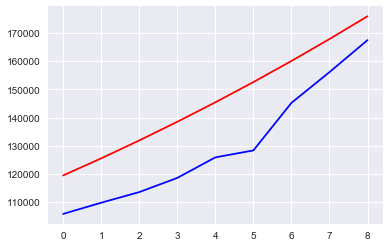

In [77]:
y_test_pred = svm_search.predict(X_test_confirmed)
plt.plot(y_test_pred,color="red")
plt.plot(y_test_confirmed,color="blue")
print('MAE:', mean_absolute_error(y_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(y_test_pred, y_test_confirmed))

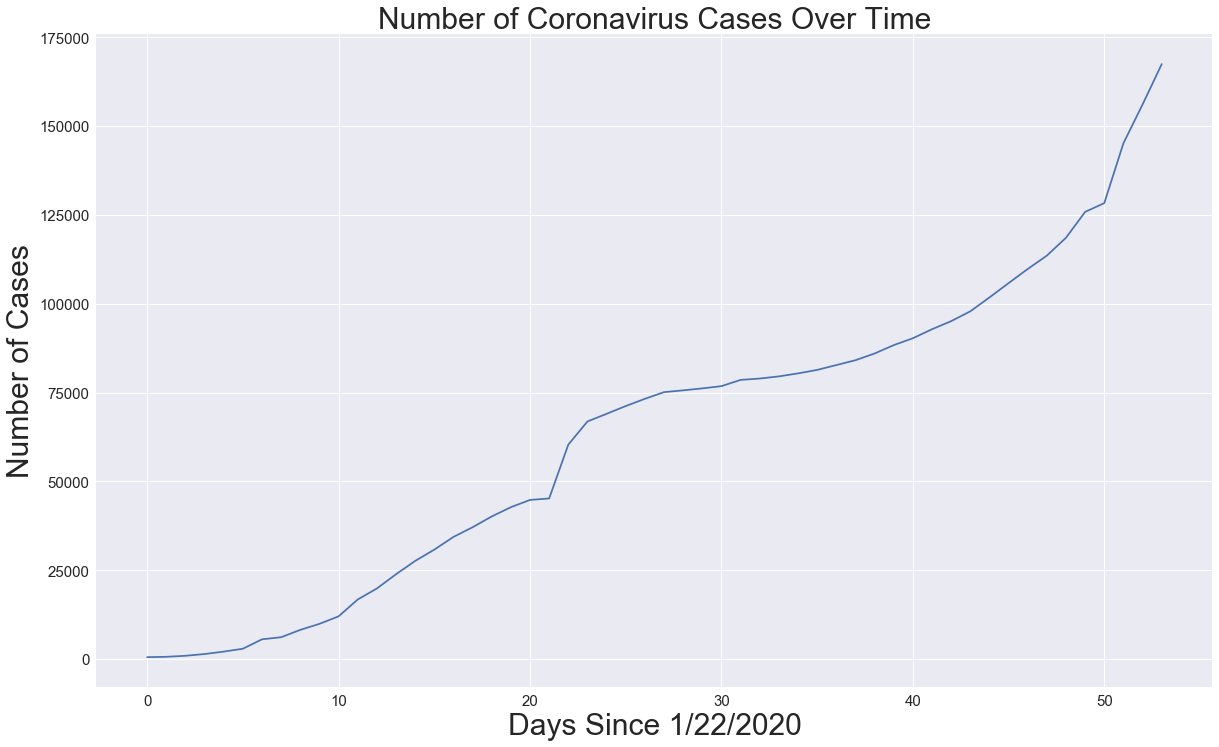

In [79]:
plt.figure(figsize=(20, 12))
plt.plot(total_dates, total_confirmed_world_cases)
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

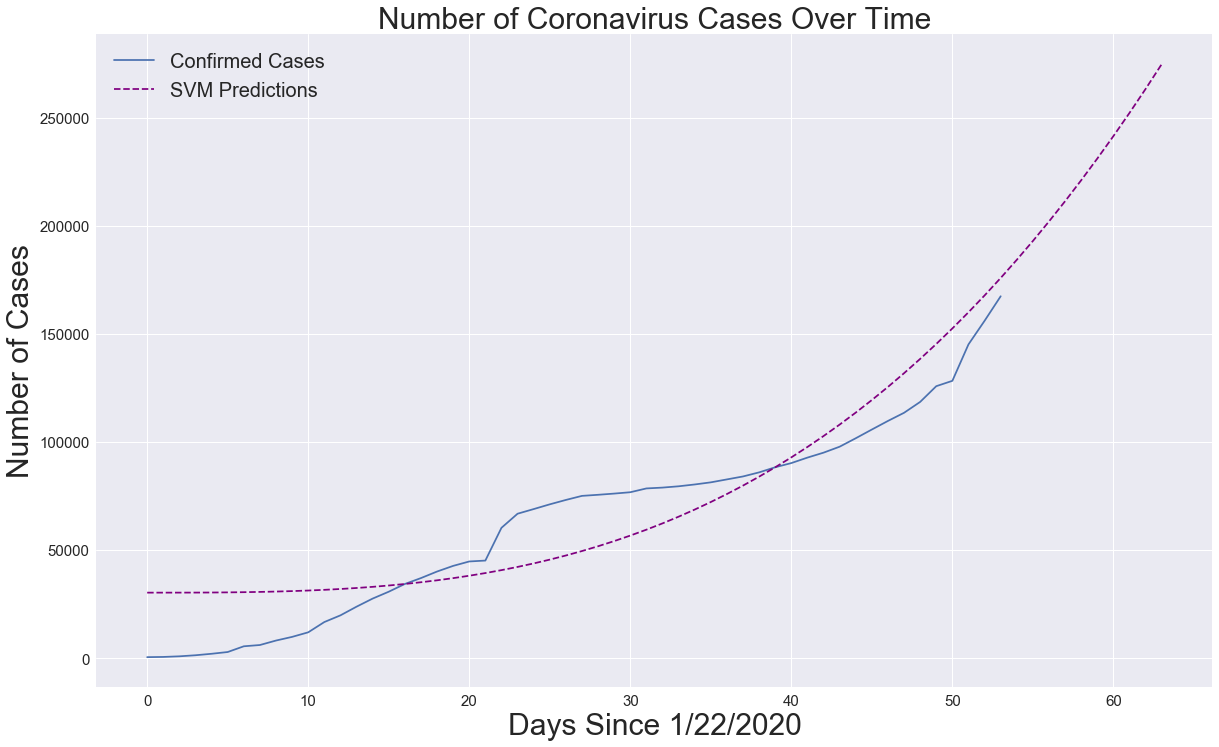

In [130]:
plt.figure(figsize=(20, 12))
plt.plot(total_dates, total_confirmed_world_cases)
plt.plot(future_forecast, svm_pred,linestyle='dashed', color='purple')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM Predictions'],fontsize=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [95]:
# Predictions for the next 10 days using SVM

print('SVM future predictions:')
set(zip(future_forcast_dates[-10:], svm_pred[-10:]))

SVM future predictions:


{('03/16/2020', 184301.4329238902),
 ('03/17/2020', 193011.53524916767),
 ('03/18/2020', 202044.19775482191),
 ('03/19/2020', 211405.28517140614),
 ('03/20/2020', 221100.66222947178),
 ('03/21/2020', 231136.19365957196),
 ('03/22/2020', 241517.74419225854),
 ('03/23/2020', 252251.1785580839),
 ('03/24/2020', 263342.36148760037),
 ('03/25/2020', 274797.15771136014)}

In [105]:
# Using Linear regression model to make predictions
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 11965.537037037033
MSE: 307996364.0108404


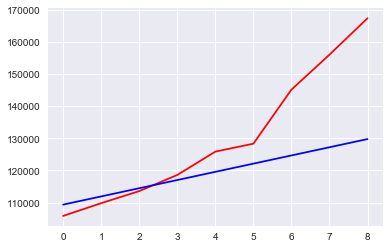

In [108]:
plt.plot(y_test_confirmed,color='red')
plt.plot(test_linear_pred,color='blue')

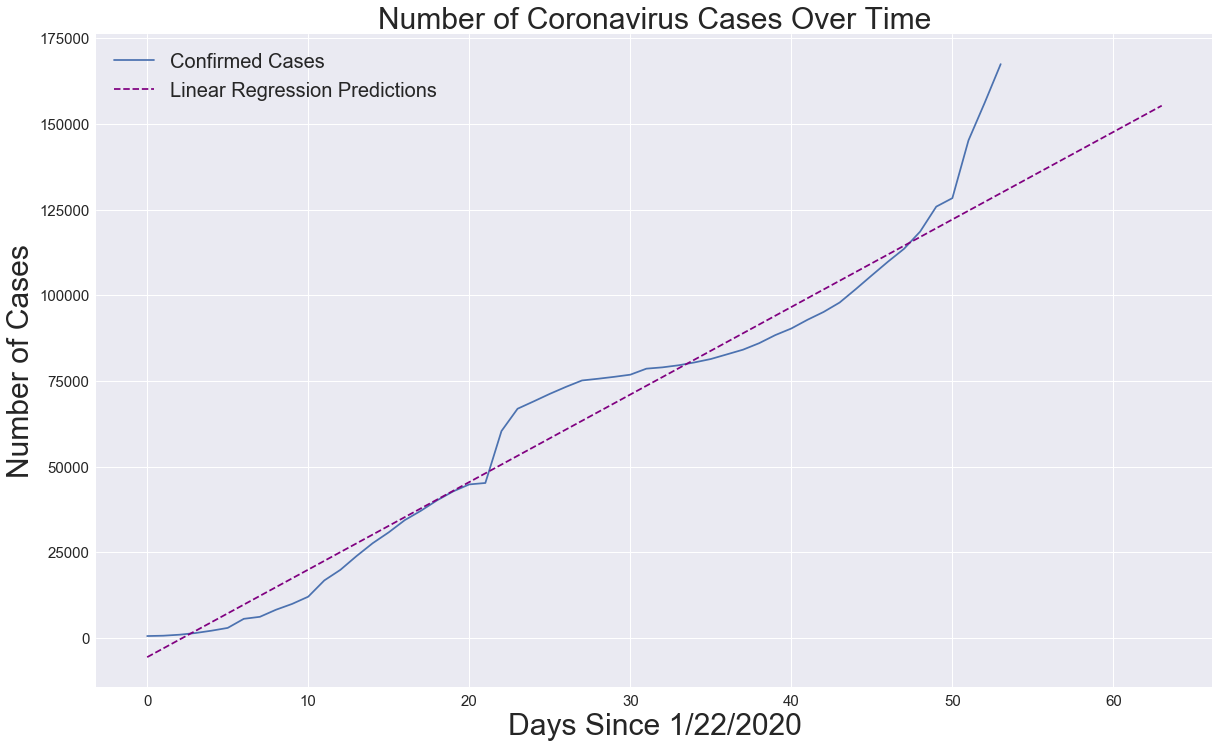

In [129]:
plt.figure(figsize=(20, 12))
plt.plot(total_dates, total_confirmed_world_cases)
plt.plot(future_forecast, linear_pred,linestyle='dashed', color='purple')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'],fontsize=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [114]:
print('Linear regression future predictions:')
print(linear_pred[-10:])

Linear regression future predictions:
[[132336.25252525]
 [134890.72222222]
 [137445.19191919]
 [139999.66161616]
 [142554.13131313]
 [145108.6010101 ]
 [147663.07070707]
 [150217.54040404]
 [152772.01010101]
 [155326.47979798]]


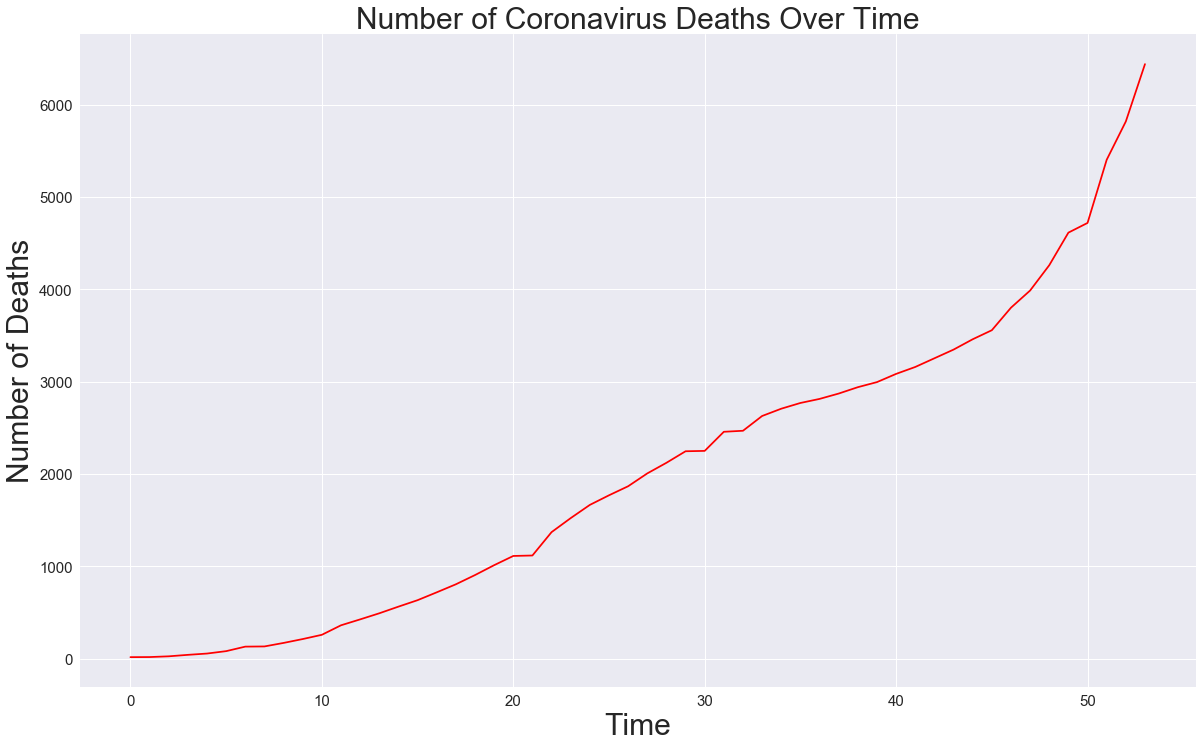

In [116]:
# Total deaths over time
plt.figure(figsize=(20, 12))
plt.plot(total_dates, total_deaths, color='red')
plt.title('Number of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Deaths', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

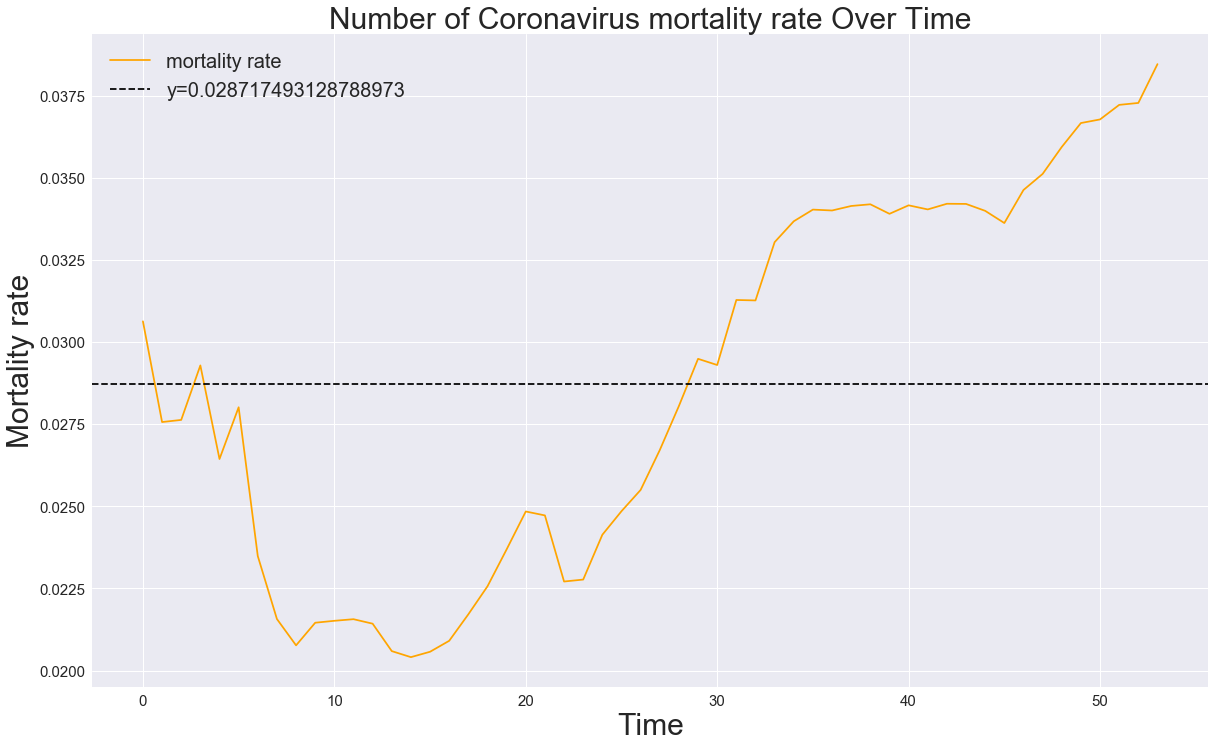

In [128]:
# Total deaths over time
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(total_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Number of Coronavirus mortality rate Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)],fontsize=20)
plt.xlabel('Time', size=30)
plt.ylabel('Mortality rate', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

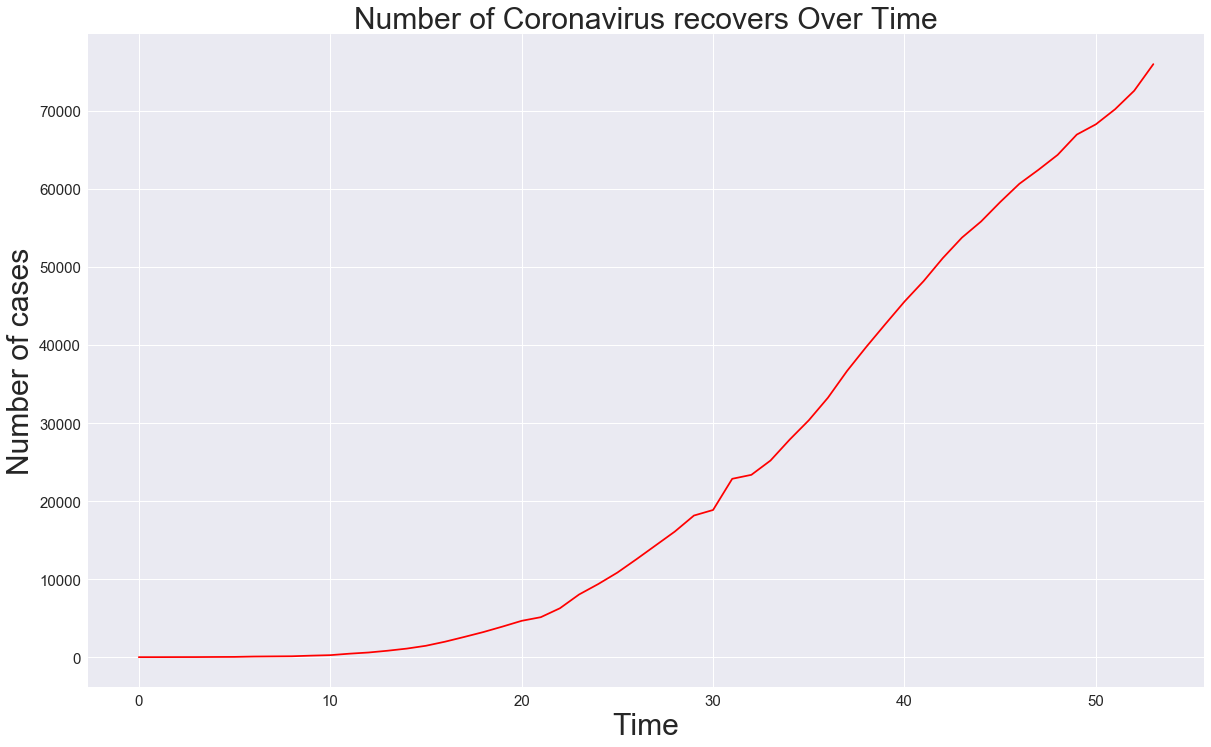

In [125]:
# Total recover over time
plt.figure(figsize=(20, 12))
plt.plot(total_dates, total_recovered, color='red')
plt.title('Number of Coronavirus recovers Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

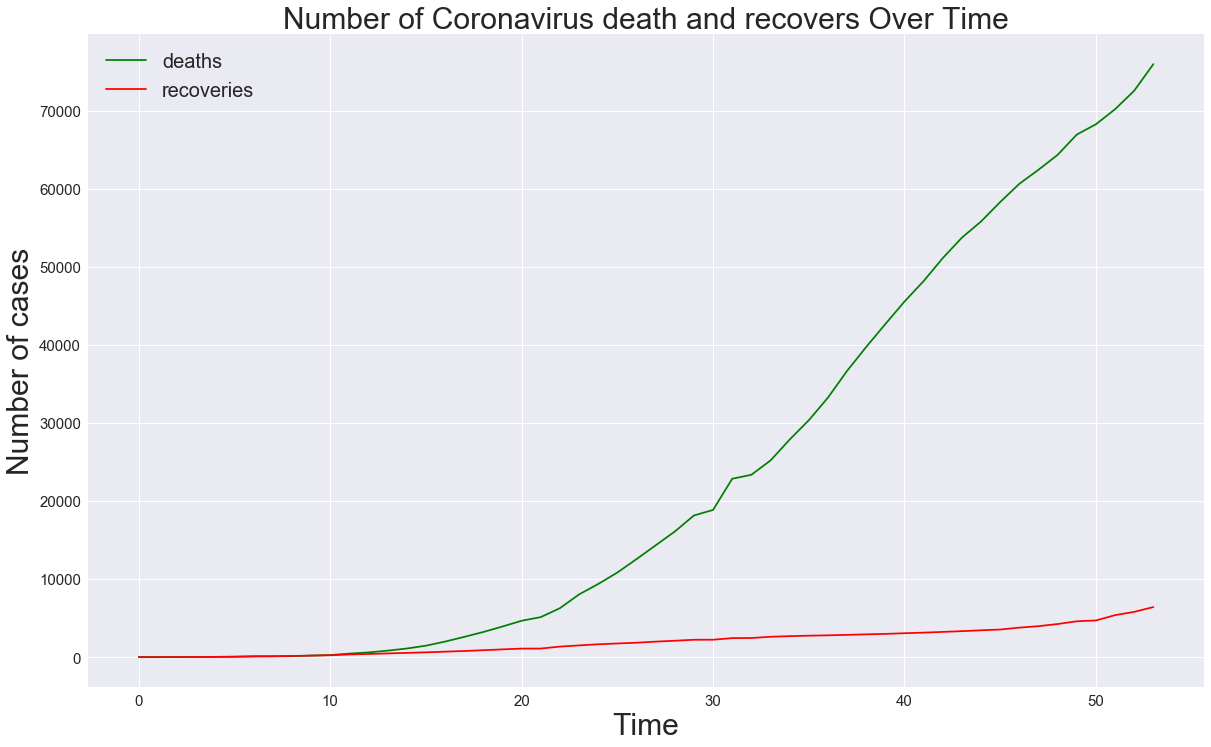

In [127]:
# Number of Coronavirus cases recovered vs the number of deaths 
plt.figure(figsize=(20, 12))
plt.plot(total_dates, total_recovered, color='green')
plt.plot(total_dates, total_deaths, color='red')
plt.title('Number of Coronavirus death and recovers Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of cases', size=30)
plt.legend(['deaths', 'recoveries'], loc='best', fontsize=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


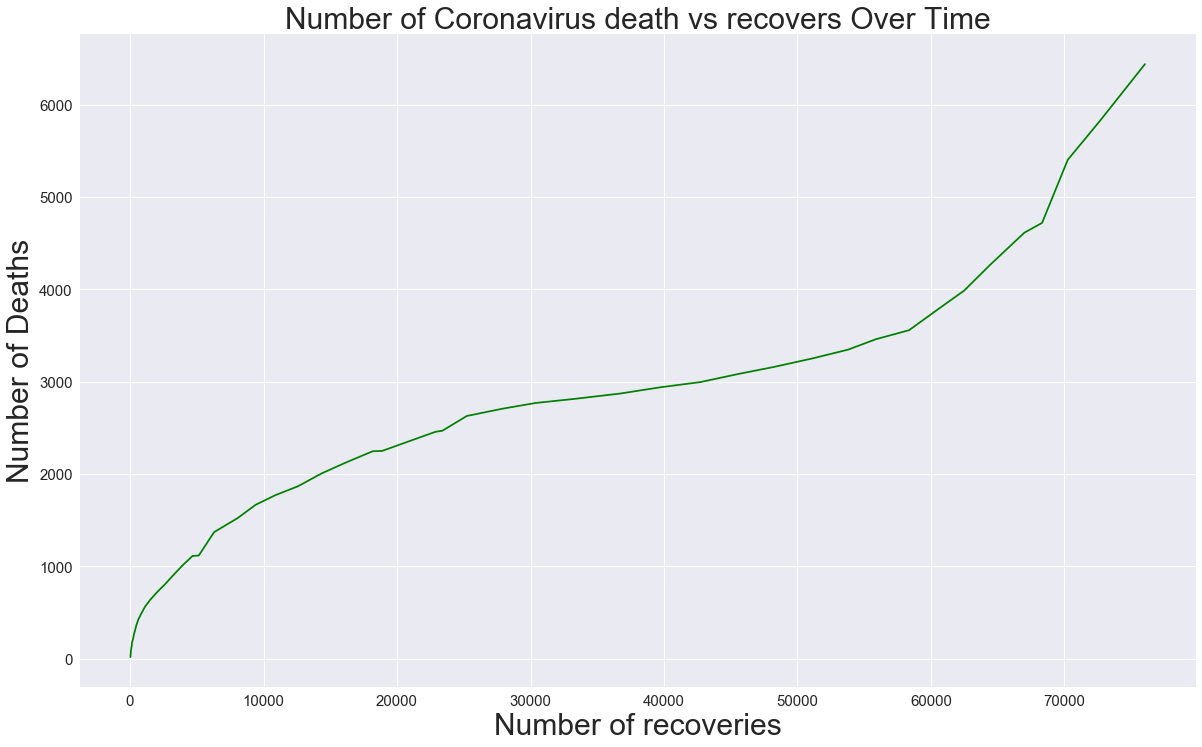

In [131]:
# Coronavirus Deaths vs Recoveries
plt.figure(figsize=(20, 12))
plt.plot(total_recovered,total_deaths, color='green')
plt.title('Number of Coronavirus death vs recovers Over Time', size=30)
plt.xlabel('Number of recoveries', size=30)
plt.ylabel('Number of Deaths', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()